(682, 1024, 3)


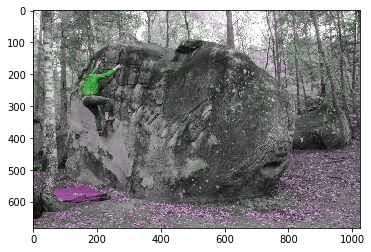

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

filename = 'Boulder_image.jpg'
percent = 0.9

##the SVD Function

def svdimage(filename,percent):
    image = plt.imread(filename)   
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    
    image_b = image[:,:,2]


    Ur,sigma_r,VTr = la.svd(image_r)
    Ug,sigma_g,VTg = la.svd(image_g)
    Ub,sigma_b,VTb = la.svd(image_r)

    R=np.zeros(image_r.shape)
    G=np.zeros(image_g.shape)
    B=np.zeros(image_b.shape)



    for i in range(int(percent*len(sigma_r))+1):
        R += sigma_r[i]*np.dot(Ur[:,i].reshape(-1,1),VTr[i,:].reshape(1,-1))
    for i in range(int(percent*len(sigma_g))+1):
        G += sigma_g[i]*np.dot(Ug[:,i].reshape(-1,1),VTg[i,:].reshape(1,-1))
    for i in range(int(percent*len(sigma_b))+1):
        B += sigma_b[i]*np.dot(Ub[:,i].reshape(-1,1),VTb[i,:].reshape(1,-1))
    
    final=np.stack((R,G,B),2)
    final[final>255]=255
    final[final<0]=0
    final=np.rint(final).astype('uint8')
    return final


Comp = svdimage(filename,percent)
print(Comp.shape)
plt.imshow(Comp)




    


